In [72]:
import glob
import math
import os
import sqlite3
import subprocess
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

sns.set()
plt.rcParams['figure.figsize'] = [16, 8]

In [73]:
#from google.colab import drive
#drive.mount('/content/drive')

DB_BASE = os.getcwd()
DB_FILES = [
    "HighTraffic_PLOEG_mpr_0_fer_0.db",
    "HighTraffic_PLOEG_mpr0.4_per0.db",
    "HighTraffic_PLOEG_mpr_0.7_fer_0.db",
]

df = pd.DataFrame()
for f in DB_FILES:
  dbpath = os.path.join(DB_BASE, f)
  if not os.path.exists(dbpath):
    raise ValueError("not found: " + dbpath)
  conn = sqlite3.connect(dbpath)
  query = conn.execute('select * from collisions;')
  cols = [c[0] for c in query.description]
  tmp = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
  df = df.append(tmp)

In [74]:
df.describe()

run_id  leader_node_id  follower_node_id  start_seconds  \
count  93016.000000    93016.000000      93016.000000   93016.000000   
mean       7.411241     1466.888148       1474.164810   25447.805442   
std        2.878621      640.145947        639.244572     244.326150   
min        2.000000        2.000000          2.000000   25202.000000   
25%        6.000000      958.000000        974.000000   25274.000000   
50%        6.000000     1400.000000       1409.000000   25369.000000   
75%       10.000000     1997.000000       2002.000000   25539.000000   
max       10.000000     6029.000000      10156.000000   26988.000000   

        end_seconds           ttc  
count  93016.000000  93016.000000  
mean   25449.362680      5.877749  
std      244.132182      2.520708  
min    25202.000000      0.074617  
25%    25276.000000      3.861273  
50%    25371.000000      6.027170  
75%    25540.000000      8.040554  
max    26991.000000      9.999949

Text(0.5, 1.0, 'boxplot of ttc by run_id')

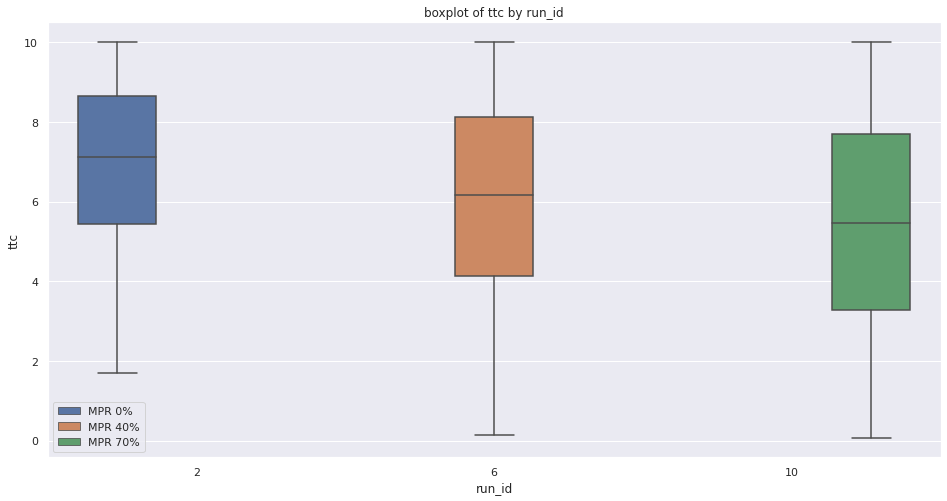

In [75]:
RUNID_MAP = {
    '2': "MPR 0%",
    '6': "MPR 40%",
    '10': "MPR 70%",
}
g = sns.boxplot(data=df, x='run_id', y="ttc", hue='run_id', order=map(int, RUNID_MAP.keys()))
handles, labels = g.get_legend_handles_labels()
new_labels = [RUNID_MAP[l] for l in labels]
plt.legend(handles, new_labels)
plt.title("boxplot of ttc by run_id")


Text(0.5, 1.0, 'count of ttc <= 1s by run_id')

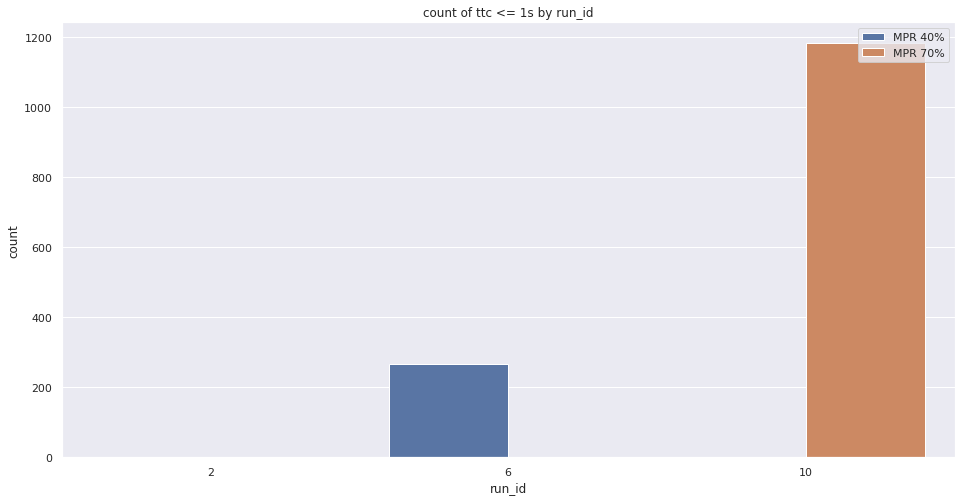

In [76]:
RUNID_MAP = {
    '2': "MPR 0%",
    '6': "MPR 40%",
    '10': "MPR 70%",
}
g = sns.countplot(data=df[df.ttc <= 1], x='run_id', hue='run_id', order=map(int, RUNID_MAP.keys()))
handles, labels = g.get_legend_handles_labels()
new_labels = [RUNID_MAP[l] for l in labels]
plt.legend(handles, new_labels)
plt.title("count of ttc <= 1s by run_id")


In [77]:
RUNID_MAP = {
    '2': "MPR 0%",
    '6': "MPR 40%",
    '10': "MPR 70%",
}
g = sns.histplot(data=df[df.ttc <= 1], x='ttc', hue='run_id', multiple='dodge', hue_order=map(int, RUNID_MAP.keys()))
plt.title("count of ttc <= 1s by run_id")


Text(0.5, 1.0, 'count of ttc <= 1s by run_id')

In [78]:
RUNID_MAP = {
    '2': "MPR 0%",
    '6': "MPR 40%",
    '10': "MPR 70%",
}
g = sns.countplot(data=df[df.ttc <= 0.75], x='run_id', hue='run_id', order=map(int, RUNID_MAP.keys()))
handles, labels = g.get_legend_handles_labels()
new_labels = [RUNID_MAP[l] for l in labels]
plt.legend(handles, new_labels)
plt.title("count of ttc <= 0.75s by run_id")


Text(0.5, 1.0, 'count of ttc <= 0.75s by run_id')

Text(0.5, 1.0, 'count of ttc <= 0.75s by run_id')

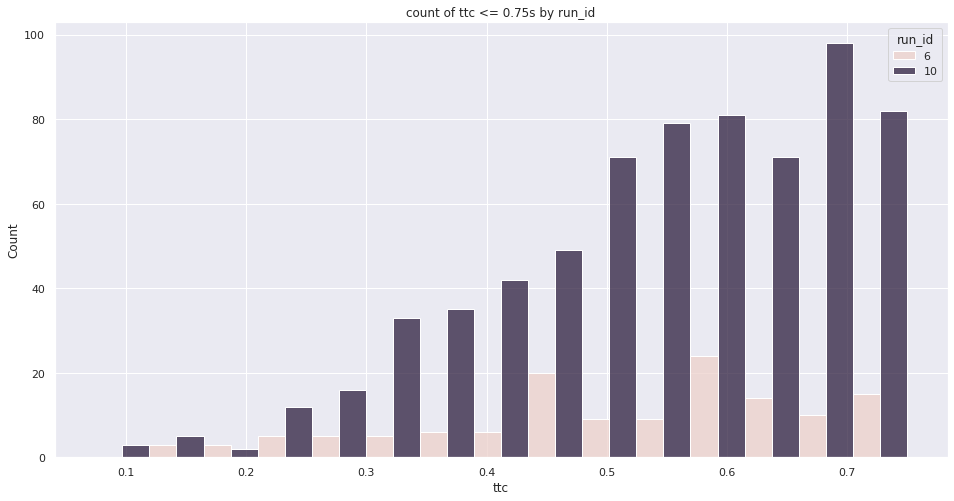

In [79]:
RUNID_MAP = {
    '2': "MPR 0%",
    '6': "MPR 40%",
    '10': "MPR 70%",
}
g = sns.histplot(data=df[df.ttc <= 0.75], x='ttc', hue='run_id', multiple='dodge', hue_order=map(int, RUNID_MAP.keys()))
plt.title("count of ttc <= 0.75s by run_id")
